In [144]:
from collections import Counter
from pathlib import Path

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [145]:
train_dir = Path('train')
test_dir = Path('test')

In [146]:
assert train_dir.is_dir()
train_paths = list(p for p in train_dir.glob('*.png'))

In [147]:
assert test_dir.is_dir()
test_paths = list(p for p in test_dir.glob('*.png'))

In [148]:
assert len(train_paths) == len(list(train_dir.iterdir()))
assert len(test_paths) == len(list(test_dir.iterdir()))

dirs contain images only and all images have same png format

In [149]:
print('Train set contains {} images'.format(len(train_paths)))
print('Test set contains {} images'.format(len(test_paths)))

Train set contains 562 images
Test set contains 321 images


In [150]:
train_labels = [p.stem for p in train_paths]

In [151]:
def image_props(path):
    im = Image.open(path)
    return im.size[1], im.size[0], im.mode,

In [152]:
train_props = [image_props(p) for p in train_paths]

In [153]:
heights, widths, modes = zip(*train_props)

In [154]:
[
    Counter(heights),
    Counter(widths),
    Counter(modes),
]

[Counter({150: 562}), Counter({330: 562}), Counter({'RGB': 562})]

all images in train set have the same height, width
and number of channels

dataset consists of colored and grayscale images

images have background with the same pattern, sometimes it's colored too

for each image data placed on a smaller rectangle inside the image

also all images seem to have first grid row unobstructed by letters below

In [155]:
path = Path('train/1A2D4.png')
assert path.is_file()
img = Image.open(path)
img = np.array(img)

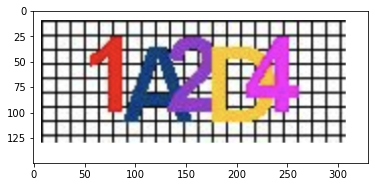

In [156]:
plt.imshow(img)

calculate mean and variance for each channel to normalize images prior to training

In [157]:
total_train = len(train_paths)
total_train

562

In [158]:
h, w = 150, 330
mean = np.zeros(shape=(3,), dtype=float)
for p in train_paths:
    img = Image.open(p)
    img = np.array(img) / total_train / h / w
    img = img.sum(axis=(0, 1))
    mean += img

mean

array([171.2757079 , 181.14579176, 190.28476865])

In [159]:
var = np.zeros(shape=(3,), dtype=float)
for p in train_paths:
    img = Image.open(p)
    img = np.power(np.array(img) - mean, 2) / total_train / h / w
    img = img.sum(axis=(0, 1))
    var += img

np.power(var, 0.5)

array([94.81493756, 91.22884898, 83.40093767])

all images seem to have 5 letter phrase written, but some labels are wrong

for example, D780.png has 'D7080' written

shall filter this labels in dataset

also some labels are written in lowercase, shall fix this too

In [160]:
wrong_labels = [l for l in train_labels if len(l) < 5]

In [161]:
print('From {} train labels {} are wrong'.format(len(train_labels), len(wrong_labels)))

From 562 train labels 3 are wrong


In [162]:
print(wrong_labels)

['D780', 'ec5f', '5A4B']
